<a href="https://colab.research.google.com/github/xueyao15/rrc_sml_assigment2/blob/main/SML_a2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Polynomial Regression
Regression Group 8:
* Mat Bosc 0376078 (Evaluator)
* Paola Katherine Pacheco 0374446 (Facilitator)
* Wai Ping Kwok 0380915
* Xueyao Wang 0352069

In [ ]:
# install turicreate in Google Colab
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 11.6 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=089f81c9743f5496a1305bfa7838a2e9664161a5bc5fffb4a0c524491c75ffbb
  Stored in directory: /root/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=7ccc249f0bbc94f6568f0efbc06273e0516db43c4d838168f89f2a4f2748960e

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

In [ ]:
# import turicreate
import turicreate as tc
# import pprint
import pprint

# **Problem 2(a)**



## Create an array of coefficients named *coefs* to define a new polynomial. where *a* is the average last digit of your group’s student numbers, *b* is the average second last digit, *c* is the average third last digit and *d* is the average fourth last digit.

In [ ]:
# Mat:    0376078
# Paola:  0374446
# Jerry:  0380915
# Xueyao: 0352069

# calculate mean with last digit student number
a = np.mean([8, 6, 5, 9])

# calculate mean with second digit student number
b = np.mean([7, 4, 1, 6])

# calculate mean with third digit student number
c = np.mean([0, 4, 9, 0])

# calculate mean with fourth digit student number
d = np.mean([6, 4, 0, 2])

# print the coefficients
print("a=", a, "b=", b, "c=", c, "d=", d)

a= 7.0 b= 4.5 c= 3.25 d= 3.0


## Our Polynomial is

𝑓(𝑥) = (7 + 1)𝑥^3+ (4.5 + 1)𝑥^2 + (3.25 + 1)𝑥 + 3.0

𝑓(𝑥) = 8𝑥^3+ 5.5𝑥^2 + 4.25𝑥 + 3.0

In [ ]:
# input value for coefs
coefs = [3, 4.25, 5.5, 8]

# print coefs
coefs

[3, 4.25, 5.5, 8]

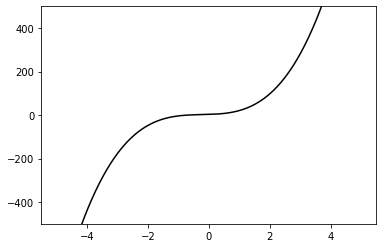

In [ ]:
# define polynomial method receiving coefs and x as a parameters
def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

# method draw_polynomial with coefs as a parameter
def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)      
    plt.ylim(-500, 500)               ## specify the plot area
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

# call method draw_polynomial using coefs as a parameter
draw_polynomial(coefs)

## Use the polynomial to generate 500 rows of x-y data and provide a scatterplot. 

In [ ]:
# create empty list X
X = []

# create empty list Y
Y = []

# generate 500 rows of x-y data
# x is float from random number in the range -5 to 5
# y is the value of the polynomial with the corresponding x value 
# plus a float random from Gaussian distribution 
# with mean 0 and standard deviation 2
for i in range(500):
    x = random.uniform(-5, 5)
    y = polynomial(coefs, x) + random.gauss(0, 2)
    X.append(x)
    Y.append(y)

In [ ]:
# print out X and Y to take a look
print("X", X)
print("Y", Y)

X [3.4442185152504816, -2.4108324970703663, 0.11274721368608542, -1.9668727392107255, -0.23403045847644144, 0.046868558173902564, -2.1816215560029617, -2.4949365863755943, 4.097462559682402, 4.021659504395828, -1.8985243068066735, 1.8398393191544127, -0.2785728454728664, 1.1088697344380165, 4.130110532378982, 3.6530992777164, -2.395076896080406, -4.8595829983598104, 2.1970468640395415, 1.6815320123185087, -4.988571806855717, -2.5608912311286804, -1.7479563725260991, 0.6751074062067186, -2.6138407138477984, -0.5203042856442961, -4.195541814474646, 4.3283382422690675, -3.909421540688963, 0.4744091132842376, 3.14466863291336, 1.0318562796138302, 0.8761706417543635, -1.1509885402733957, 0.7565101416488851, -3.132704717444449, 1.1277317986860673, -4.1017563880440635, 2.576039219664368, 3.424602231401824, 3.98173121357879, -1.087039497653751, 2.0528339985440622, 3.4948596518636705, 3.950389674266752, 0.796950107456059, -0.49436893368844803, 4.169412179474561, 2.9332508413022413, -0.135557980

In [ ]:
# double check the length of the list
print("Length of X:", len(X)) 
print("Length of Y:", len(Y)) 

Length of X: 500
Length of Y: 500


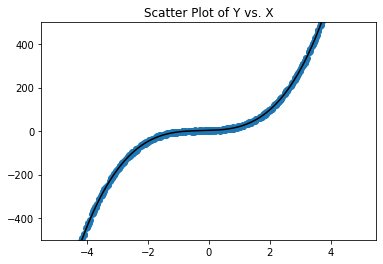

In [ ]:
# plot scatter plot of X and Y
plt.scatter(X, Y)

# specify the plot title
plt.title("Scatter Plot of Y vs. X")

# draw the coefs in the scatter plot
draw_polynomial(coefs)

# **Problem 2(b)**


In [ ]:
# create new frame data_elastic that receives the new lists X and Y
data_elastic = tc.SFrame({'x':X, 'y':Y})

# print data_elastic
data_elastic

x,y
3.4442185152504816,409.8470663180627
-2.4108324970703663,-89.46248627216478
0.11274721368608542,0.6663109246654515
-1.9668727392107255,-42.98546206062933
-0.23403045847644144,-1.5798634343154312
0.046868558173902564,1.0259010369886203
-2.1816215560029617,-63.06051990179009
-2.4949365863755943,-100.38380465502554
4.097462559682402,666.7246645038224
4.021659504395828,629.0164038987166


## Add columns to the dataset to hold powers of x up to x^n and set n=10.

In [ ]:
# set value of n
n = 10

# append new columns to data_elastic
for i in range(2, n+1):
    string = 'x^'+str(i)
    data_elastic[string] = data_elastic['x'].apply(lambda x:x**i)

# print data_elastic
data_elastic

x,y,x^2,x^3,x^4
3.4442185152504816,409.8470663180627,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,-89.46248627216478,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,0.6663109246654515,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,-42.98546206062933,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,-1.5798634343154312,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,1.0259010369886203,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,-63.06051990179009,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,-100.38380465502554,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,666.7246645038224,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,629.0164038987166,16.173745169297295,65.04529598178058,261.5900328013676


## Split the data so that 70% is used for training, 20% for validation, and 10% for testing.

In [ ]:
# split the dataset into validation set and another set for training and testing
# validate (20%) / total (100%) = 0.2
validate_elastic, train_test_elastic = data_elastic.random_split(.2, seed=0, exact=True)

In [ ]:
# check the length of validation set
print("Length of validation set:", len(validate_elastic))

Length of validation set: 100


In [ ]:
# further split the training and testing set into training and testing
# train (70%) / train_test (80%) = 0.875
train_elastic, test_elastic = train_test_elastic.random_split(.875, seed=0, exact=True)

In [ ]:
# check the length of training set
print("Length of training set:", len(train_elastic))

# check the length of testing set
print("Length of testing set:", len(test_elastic))

Length of training set: 350
Length of testing set: 50


# **Problem 2(c)**

## Write a modified *display_results()* function that uses the train/validate/test data split and use it to display the results.

In [ ]:
# a function to display the results
def display_results(model, train, validate, test):                        # added datasets as input
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Validation error (rmse):", model.evaluate(validate)['rmse'])   # added validation error     
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(validate['x'], validate['y'], marker='+')                 # added valiation 
    plt.scatter(test['x'], test['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

## Create a new model called *model_elastic_reg* that uses an L1 penalty of 0.1 and an L2 penalty of 0.1. (Using both L1 and L2 penalties is known as elastic regularization.) 

In [ ]:
# create a new model with data_elastic
# specifying L1 and L2 penalities, including the validation set 
model_elastic_reg = tc.linear_regression.create(
    train_elastic, target='y', l1_penalty=0.1, l2_penalty=0.1, 
    verbose=False, validation_set=validate_elastic)

In [ ]:
# print metrics for model_elastic_reg
model_elastic_reg

Class                          : LinearRegression

Schema
------
Number of coefficients         : 11
Number of examples             : 350
Number of feature columns      : 10
Number of unpacked features    : 10

Hyperparameters
---------------
L1 penalty                     : 0.1
L2 penalty                     : 0.1

Training Summary
----------------
Solver                         : fista
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 0.0144

Settings
--------
Residual sum of squares        : 371233.07
Training RMSE                  : 33.473

Highest Positive Coefficients
-----------------------------
x                              : 43.378
(intercept)                    : 15.68
x^2                            : 2.6186
x^3                            : 2.4513
x^5                            : 0.0868

Lowest Negative Coefficients
----------------------------
x^10                           : -0.0

Training error (rmse): 33.47302491338624
Validation error (rmse): 34.69168286800408
Testing error (rmse): 34.08391521112022


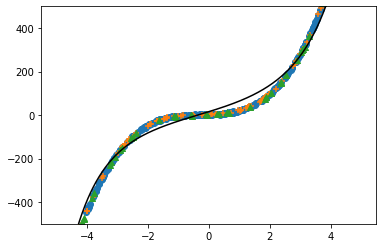

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   15.679994145521169   |
|      x      |   43.37802882028916    |
|     x^2     |   2.6186177793852083   |
|     x^3     |   2.4512982366779936   |
|     x^4     |  0.08581823034025736   |
|     x^5     |   0.0867800291237455   |
|     x^6     | 0.0019199181354377078  |
|     x^7     |  0.002592263701056769  |
|     x^8     | 1.5746110228200402e-05 |
|     x^9     | 6.596015115069087e-05  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
# display results of model_elastic_reg
display_results(model_elastic_reg, train_elastic, validate_elastic, test_elastic)

# **Problem 2(d)**


## Compare the training and validation error of *model_elastic_reg*. Comment on what this implies in terms of overfitting and/or underfitting.

*model_elastic_reg*

* Training error (rmse): 33.47302491338624
* Validation error (rmse): 34.69168286800408

The validation error and the training error are very close in value it implies that there is no overfitting. 

The model is still possible to be underfitting. However, by checking the scatter plot, it shows that *model_elastic_reg* has captured the shape of the data. Moreover, the model performs well on all training, validation and testing datasets (Testing error: 34.08391521112022). Therefore it implies the model is not underfitting.

# **Problem 2(e)**



## Create a new model named *optimal_model*. 

## Using loops, write code to try a range of values for n, L1, and L2, using three different values for each hyperparameter. (This is called a grid search.) 

## Inside the nested loops, calculate the training and validation RMSE for each set of hyperparameters and provide a labelled scatterplot. 

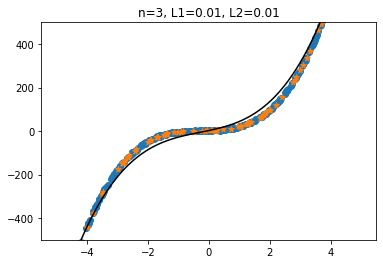

Training error: 29.517607916674084
Validation error: 32.1939118533041 



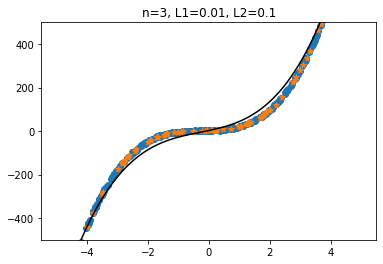

Training error: 29.56046072630765
Validation error: 32.24776986340153 



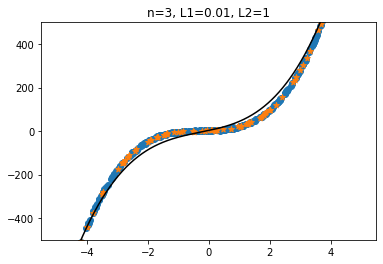

Training error: 29.991008310864924
Validation error: 32.78772373217053 



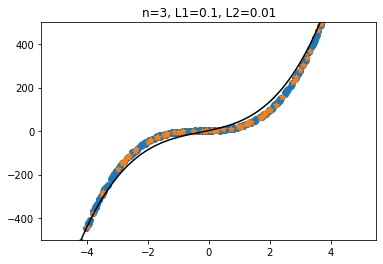

Training error: 29.51760625344108
Validation error: 32.19390728104582 



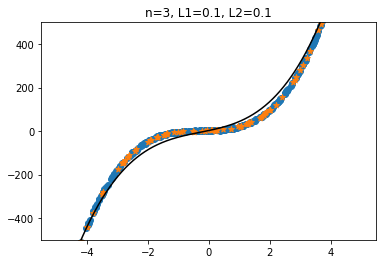

Training error: 29.560459401880383
Validation error: 32.247765573182406 



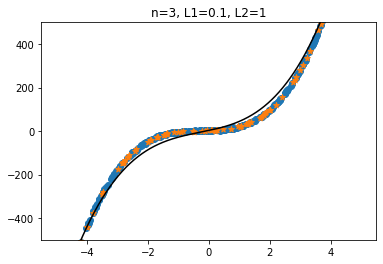

Training error: 29.991010303703078
Validation error: 32.78772220059112 



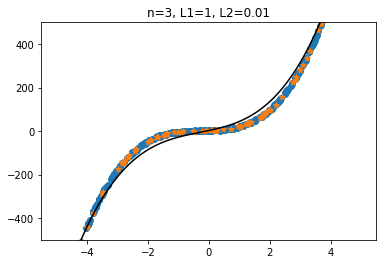

Training error: 29.517589716213447
Validation error: 32.19386163899493 



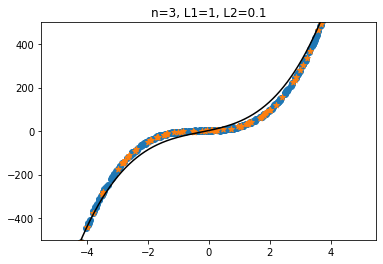

Training error: 29.560446252505958
Validation error: 32.24772275133205 



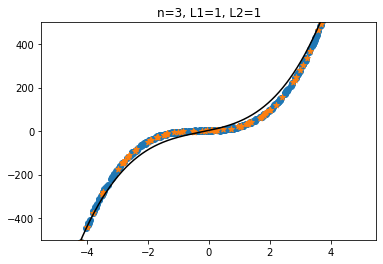

Training error: 29.99103032494966
Validation error: 32.78770696324893 



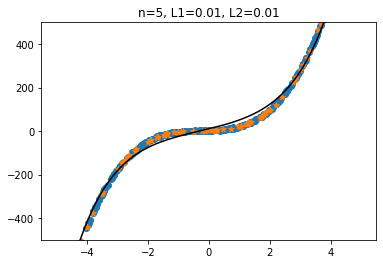

Training error: 21.060431223664196
Validation error: 21.891430237864558 



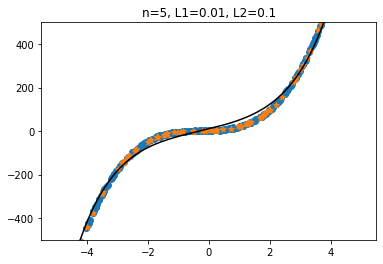

Training error: 21.063205719722255
Validation error: 21.892478254412854 



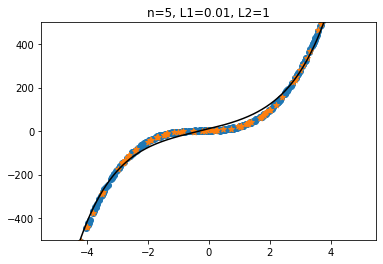

Training error: 21.094234891282827
Validation error: 21.906967818620828 



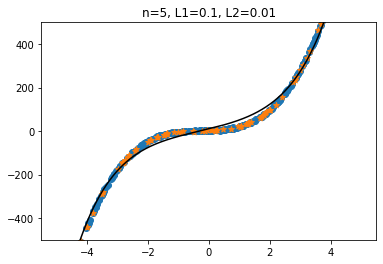

Training error: 21.060430723334115
Validation error: 21.89141625819967 



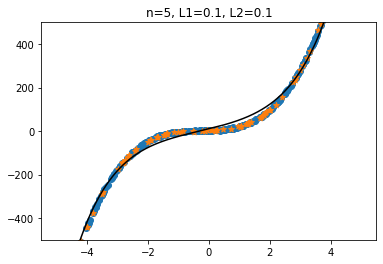

Training error: 21.063205496291047
Validation error: 21.892464511508397 



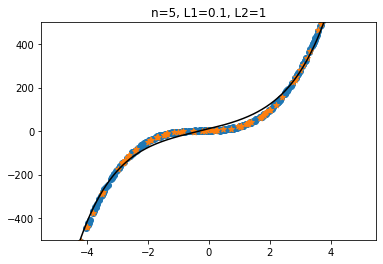

Training error: 21.094237425729887
Validation error: 21.9069564396455 



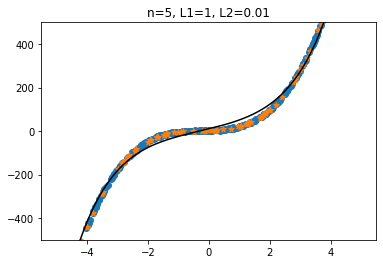

Training error: 21.060425839966154
Validation error: 21.891276569578803 



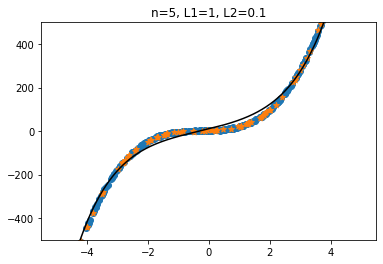

Training error: 21.063203381857587
Validation error: 21.892327190467167 



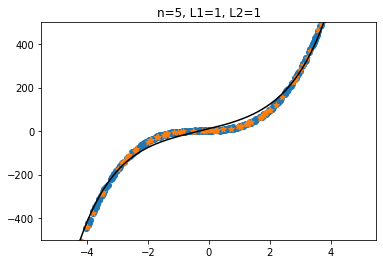

Training error: 21.09426288949458
Validation error: 21.906842757610594 



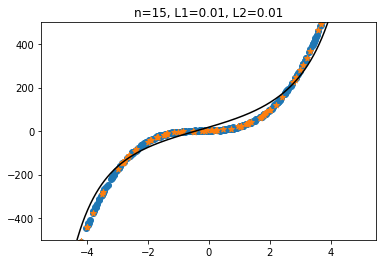

Training error: 41.639246069072556
Validation error: 41.77200438273456 



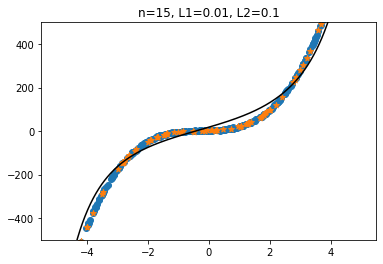

Training error: 41.65148583642486
Validation error: 41.78155223074848 



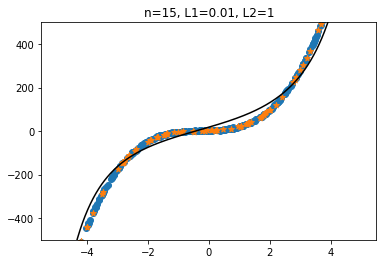

Training error: 41.77419222424823
Validation error: 41.8774050253481 



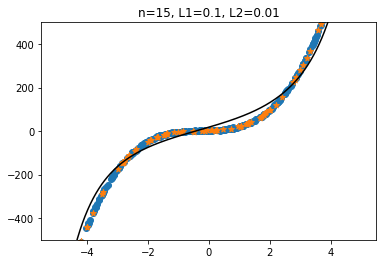

Training error: 41.63926436289957
Validation error: 41.77200304180944 



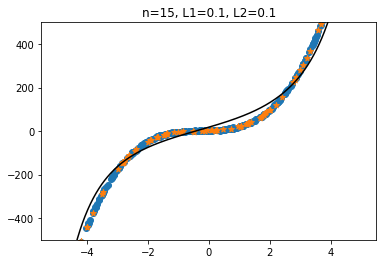

Training error: 41.65150417265201
Validation error: 41.78155093550375 



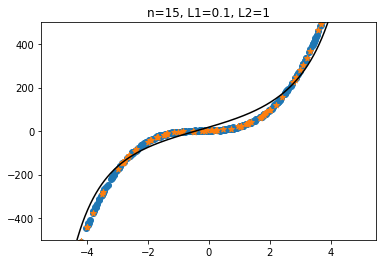

Training error: 41.774210982365396
Validation error: 41.877404185328274 



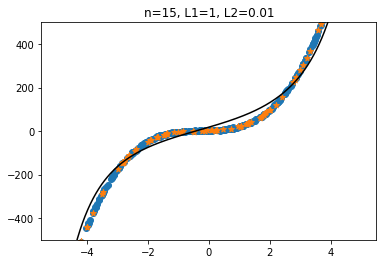

Training error: 41.63944732611299
Validation error: 41.7719896584428 



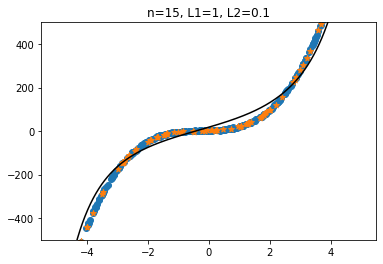

Training error: 41.651687559855354
Validation error: 41.78153800893318 



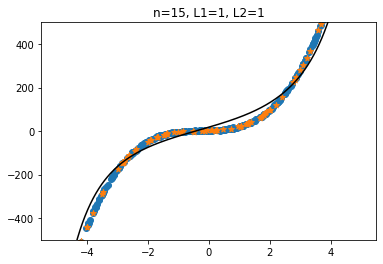

Training error: 41.77439858835123
Validation error: 41.87739581092683 



In [ ]:
# setup values for n
n_grid = [3, 5, 15]

# setup values for hyperparameter l1
l1_grid = [0.01, 0.1, 1]

# setup values for hyperparameter l2
l2_grid = [0.01, 0.1, 1]

# setup an empty dict for grid search results
result_grid = {}

# to loop through the grid, there should be 3 * 3 * 3 times
for a in n_grid:
  for b in l1_grid:
    for c in l2_grid:

      # set hyperparemeters
      hyperparameter = f'n={a}, L1={b}, L2={c}'

      # create new frame data_optimal that receives the lists X and Y from 2(a)
      data_optimal = tc.SFrame({'x':X, 'y':Y})

      # append new columns to data_optimal with the value from n grid
      for i in range(2, a + 1):
        string = 'x^'+str(i)
        data_optimal[string] = data_optimal['x'].apply(lambda x:x**i)

      # split the dataset into validation set and 
      # another set for training and testing
      # validate (20%) / total (100%) = 0.2
      validate_optimal, train_test_optimal = data_optimal.random_split(.2, seed=0, exact=True)

      # further split the training and testing set into training and testing
      # train (70%) / train_test (80%) = 0.875
      train_optimal, test_optimal = train_test_optimal.random_split(.875, seed=0, exact=True)

      # setup the optimal model using l1 grid and l2 grid and validate set
      optimal_model = tc.linear_regression.create(
          train_optimal, target='y', 
          l1_penalty=b, l2_penalty=c, 
          verbose=False, validation_set=validate_optimal)
      
      # get the value of training error
      training_error = optimal_model.evaluate(train_optimal)['rmse']
      # get the value of validation error
      validation_error = optimal_model.evaluate(validate_optimal)['rmse']

      # initialize a key in result_grid
      result_grid.setdefault(hyperparameter)
      # add training errors and validation errors with the associated hyperparameter into result_grid
      result_grid[hyperparameter] = (f'training error: {training_error}', f'validation error: {validation_error}')
      
      # get the coefficients of the optimal_model
      coefs = optimal_model.coefficients

      # plot train_optimal set
      plt.scatter(train_optimal['x'], train_optimal['y'], marker='o')
      # plot validate_optimal set
      plt.scatter(validate_optimal['x'], validate_optimal['y'], marker='*')
      # add title to each plot
      plt.title(hyperparameter)
      # draw the polynomial regression line for each training
      draw_polynomial(coefs['value'])
      # display scatter plot
      plt.show()
      # display the training error
      print("Training error:", training_error)
      # display the validation error
      print("Validation error:", validation_error, "\n")

## After the loops are done, print out the training and validation RMSE for each set of hyperparameters.

In [ ]:
# print out the training and validation rmse for 27 sets of hyperparameters
pprint.pprint(result_grid)

{'n=15, L1=0.01, L2=0.01': ('training error: 41.639246069072556',
                            'validation error: 41.77200438273456'),
 'n=15, L1=0.01, L2=0.1': ('training error: 41.65148583642486',
                           'validation error: 41.78155223074848'),
 'n=15, L1=0.01, L2=1': ('training error: 41.77419222424823',
                         'validation error: 41.8774050253481'),
 'n=15, L1=0.1, L2=0.01': ('training error: 41.63926436289957',
                           'validation error: 41.77200304180944'),
 'n=15, L1=0.1, L2=0.1': ('training error: 41.65150417265201',
                          'validation error: 41.78155093550375'),
 'n=15, L1=0.1, L2=1': ('training error: 41.774210982365396',
                        'validation error: 41.877404185328274'),
 'n=15, L1=1, L2=0.01': ('training error: 41.63944732611299',
                         'validation error: 41.7719896584428'),
 'n=15, L1=1, L2=0.1': ('training error: 41.651687559855354',
                        'validatio

# **Problem 2(f)**



## By referring to training error, validation error, complexity, and scatterplots, select the best set of parameters for *optimal_model* and justify your choice.

The best set of hyperparameters are n=5, L1=1, L2=0.01 

* validation error (21.891276569578803) is the lowest of the 27 sets;
* training error is very close to validation error (training error: 21.060425839966154, validation error: 21.891276569578803), implying no overfitting;
* both training error and validation error are very low, implying it is a good fit
* the degree of the polynomial is 5 which is not too simple nor too complex;
* in the scatter plot, the polynomial captures the data well.


---


If we take complexity into more important consideration, we may suggest to choose among models with n=3. For those n=3, the model with smallest validation error is n=3, L1=1, L2=0.01 (training error: 29.517589716213447, validation error: 32.19386163899493). We may need other measures to help decide between these two models (n=5, L1=1, L2=0.01 and n=3, L1=1, L2=0.01).

We are also curious about the reason behind the errors from n=3 (as we know the polynomial is to the power n=3) is larger than those in n=5 in general, which may need more investigations.



# **Problem 2(g)**



## Use the modified *display_results()* function to display the results of *optimal_model*.

Training error (rmse): 21.060425839966154
Validation error (rmse): 21.891276569578803
Testing error (rmse): 19.681306724789334


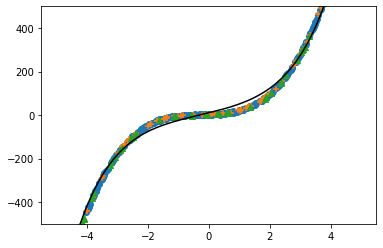

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  10.383524027341124 |
|      x      |  34.34006160985081  |
|     x^2     |  2.873509719976034  |
|     x^3     |  3.188967422642241  |
|     x^4     | 0.12181175512285494 |
|     x^5     |  0.1592622976316626 |
+-------------+---------------------+
[6 rows x 2 columns]



In [ ]:
# specify n based on previous result
n_best = 5

# specify l1 based on previous result
l1_best = 1

# specify l2 based on previous result
l2_best = 0.01

# create new frame data_optimal_best that receives the lists X and Y from 2(a)
data_optimal_best = tc.SFrame({'x':X, 'y':Y})

# append new columns to data_optimal_best with the value from n grid
for i in range(2, n_best + 1):
  string = 'x^'+str(i)
  data_optimal_best[string] = data_optimal_best['x'].apply(lambda x:x**i)

# split the dataset into validation set and another set for training and testing
# validate (20%) / total (100%) = 0.2
validate_optimal_best, train_test_optimal_best = data_optimal_best.random_split(.2, seed=0, exact=True)

# further split the training and testing set into training and testing
# train (70%) / train_test (80%) = 0.875
train_optimal_best, test_optimal_best = train_test_optimal_best.random_split(.875, seed=0, exact=True)

# setup the optimal model using l1 and l2 from grid and validate set
optimal_model_best = tc.linear_regression.create(
    train_optimal_best, target='y', 
    l1_penalty=l1_best, l2_penalty=l2_best, 
    verbose=False, validation_set=validate_optimal_best)

# use the modified display_results() function from 2(c) 
# to display the results of the best optimal_model.
display_results(optimal_model_best, train_optimal_best, validate_optimal_best, test_optimal_best)

## Compare this with the results of *model_elastic_reg* in part (c), and justify your choice for which model is better.

Training error (rmse): 33.47302491338624
Validation error (rmse): 34.69168286800408
Testing error (rmse): 34.08391521112022


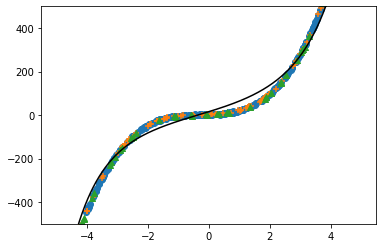

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   15.679994145521169   |
|      x      |   43.37802882028916    |
|     x^2     |   2.6186177793852083   |
|     x^3     |   2.4512982366779936   |
|     x^4     |  0.08581823034025736   |
|     x^5     |   0.0867800291237455   |
|     x^6     | 0.0019199181354377078  |
|     x^7     |  0.002592263701056769  |
|     x^8     | 1.5746110228200402e-05 |
|     x^9     | 6.596015115069087e-05  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
# display results of model_elastic_reg
display_results(model_elastic_reg, train_elastic, validate_elastic, test_elastic)

The *optimal_model_best* (*optimal_model* with hyperparameters n=5, L1=1, L2=0.01) is better than *model_elastic_reg* for the following reasons:

* validation error is smaller (21.891276569578803 < 34.69168286800408);
* training error is smaller (21.060425839966154 < 33.47302491338624);
* the difference between validataion error and training error is smaller;
* the complexity is smaller (5 < 10);
* the *optimal_model_best* fits the data points better in the scatter plot.

## Explain why it is necessary to use a train/validate/test split, rather than just a train/test split.

A train/validate/test split is needed bacause they serve different purposes. Training data is to fix parameters; validation data is to compare models and to select hyperparameters; testing data is to evaluate performance of the final model.

We can use validation set to make decisions about hyperparameters in our model. The validation set serves to find the training breakpoint and we can adjust the hyperparameters to get the best model with lowest error, i.e. best accuracy. When we use train/validate/test split, we can get metrics to improve the model's training. On the other hand, validation set helps us to avoid using testing data to train the model and decide which model to pick, which may lead to overfitting.

If we choose to use only the train/test split, we may not find the model with less complexity and better fit for the data set. It is because testing data alone cannot help make decisions on the model or make adjustment to its hyperparameters.

# Evaluation

<table> 
  <tr>
    <th>Student</th>
    <th>Mat Bosc</th>
    <th>Paola Katherine Pacheco</th>
    <th>Wai Ping Kwok</th>
    <th>Xueyao Wang</th>
  </tr>
  <tr>
    <th>Problem step 1</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
  </tr>
  <tr>
    <th>Problem step 2</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
  </tr>
  <tr>
    <th>Problem step 3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
  </tr>
  <tr>
    <th>Every member contributed</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
  </tr>
  <tr>
    <th>Every member treated with respect</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
    <th>3</th>
  </tr>
 